# Import Modules

In [20]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../')
import TAZ

In [21]:
%matplotlib widget

# Basic Fitting Example (WigBayes)

### Defining Mean Parameter Data

In [22]:
# Particle Types:
Target = TAZ.Particle(Z=73, A=181, I=7/2, mass=180.9479958, name='Ta-181')
Projectile = TAZ.Neutron

# Mean Parameters:
EB    = (1e-5, 2550)
false_dens = 1/6 #1/15
lvl_dens = [1/8.9868, 1/8.3065]
gn2m   = [44.11355, 33.38697]
gg2m   = [55.00000, 55.00000]
dfn   = [1, 1]
dfg   = [250, 250]
l     = [0, 0]
j     = [3.0, 4.0]

SGs = TAZ.Spingroup.zip(l, j)
reaction = TAZ.Reaction(targ=Target, proj=Projectile, lvl_dens=lvl_dens, gn2m=gn2m, nDOF=dfn, gg2m=gg2m, gDOF=dfg, spingroups=SGs, EB=EB, false_dens=false_dens)

print('Target Particle:')
print(repr(Target))
print()
print('Reaction Parameters:')
print(reaction)

Target Particle:
Particle       = Ta-181
Atomic Number  = 73
Atomic Mass    = 181
Nuclear Spin   = 7/2
Mass           = 180.9479958 (amu)
Nuclear Radius = 6.9576830 (fm)


Reaction Parameters:
Target Particle     = Ta-181
Projectile Particle = neutron
Channel Radius      = 7.7576830 (fm)
Energy Bounds       = 1.000e-05 < E < 2.550e+03 (eV)
False Level Density = 0.1666667 (1/eV)

                            3+          4+
Level Densities       0.111274    0.120388
Brody Parameters      1.000000    1.000000
Mean Neutron Width   44.113550   33.386970
Neutron Width DOF     1.000000    1.000000
Mean Gamma Width     55.000000   55.000000
Gamma Width DOF     250.000000  250.000000
Truncation N Width    0.000000    0.000000
Missing Fraction      0.000000    0.000000


### Sample Resonance Ladder

In [23]:
Res, Types, Missed_Res, Missed_Types = reaction.sample()

### Running WigBayes

In [24]:
prior, log_likelihood_prior = TAZ.PTBayes(Res, reaction)
distributions = reaction.distributions('Wigner')
runMaster = TAZ.RunMaster(Res.E, reaction.EB, distributions, reaction.false_dens, prior, log_likelihood_prior)
posterior, log_likelihood = runMaster.WigBayes(return_log_likelihood=True, verbose=True)

Preparing level-spacings
Finished level-spacing calculations
Finished CP calculation
Finished WigBayes calculation


### Analysis

PT-only score =   0.50%
Wigner+PT score =  51.09%

Confusion Matrix:
     A    B  F
A   87   47  0
B  165  219  0
F   36   45  0



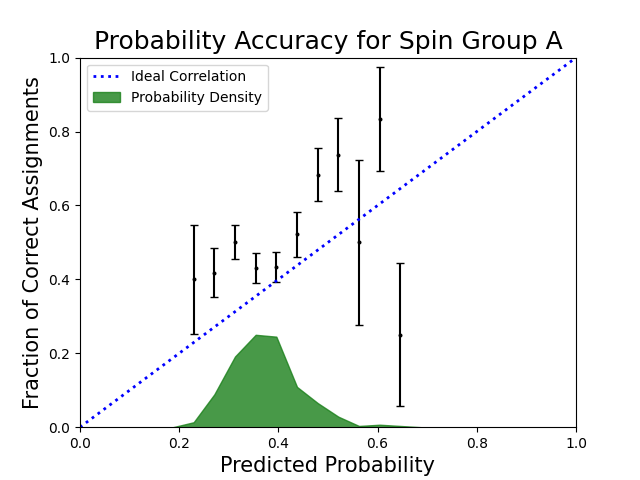

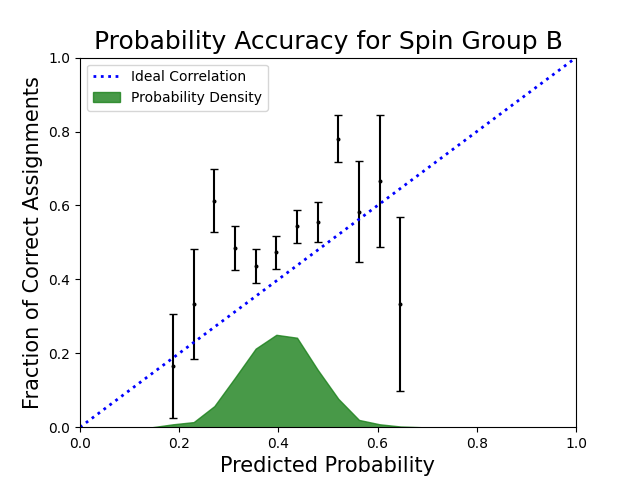

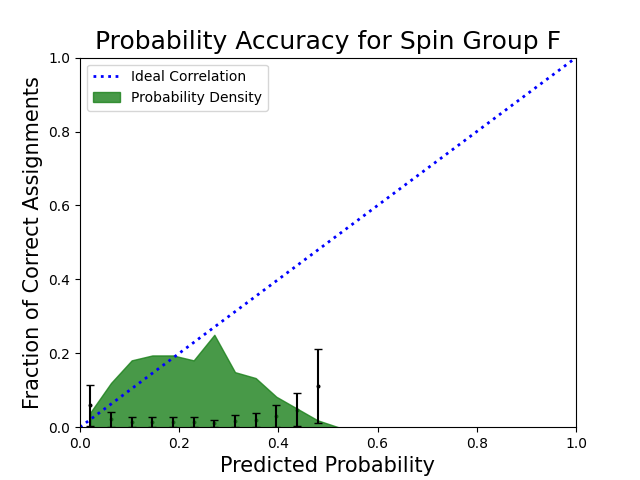

In [25]:
TAZ.analysis.PrintScore(prior, Types, 'PT-only')
TAZ.analysis.PrintScore(posterior, Types, 'Wigner+PT')
print()
TAZ.analysis.ConfusionMatrix(posterior, Types, ['A', 'B', 'F'])
print()
TAZ.analysis.ProbCorrPlot(posterior, Types, ['A', 'B', 'F'], fig_num=10)

### Posterior Results

In [26]:
print(posterior)

[[0.36496269 0.35993924 0.27509808]
 [0.34274128 0.40165375 0.25560497]
 [0.42139574 0.47986314 0.09874112]
 ...
 [0.3228237  0.45433392 0.22284238]
 [0.49613804 0.39759109 0.10627087]
 [0.37427829 0.52119482 0.10452689]]


# 3 Spingroup Case

In [36]:
EB    = (1e-5, 2550)
pM    = [0.12547, 0.14404, 0.1]
false_dens = 0.2
lvl_dens  = [1/8, 1/8.3065, 1/8]
gn2m   = [44.11355, 33.38697, 20]
gg2m   = [55.00000, 55.00000, 55.0]
dfn   = [1, 1, 1]
dfg   = [250, 250, 250]
l     = [0, 0, 1]
j     = [3.0, 4.0, 3.5]

SGs = TAZ.Spingroup.zip(l, j)
reaction = TAZ.Reaction(targ=Target, proj=Projectile, lvl_dens=lvl_dens, gn2m=gn2m, nDOF=dfn, gg2m=gg2m, gDOF=dfg, spingroups=SGs, EB=EB, false_dens=false_dens)

print('Printing Mean Parameters:')
print(reaction)

Printing Mean Parameters:
Target Particle     = Ta-181
Projectile Particle = neutron
Channel Radius      = 7.7576830 (fm)
Energy Bounds       = 1.000e-05 < E < 2.550e+03 (eV)
False Level Density = 0.2000000 (1/eV)

                           3+          4+     7/2-
Level Densities       0.12500    0.120388    0.125
Brody Parameters      1.00000    1.000000    1.000
Mean Neutron Width   44.11355   33.386970   20.000
Neutron Width DOF     1.00000    1.000000    1.000
Mean Gamma Width     55.00000   55.000000   55.000
Gamma Width DOF     250.00000  250.000000  250.000
Truncation N Width    0.00000    0.000000    0.000
Missing Fraction      0.00000    0.000000    0.000


In [37]:
Res, Types, Missed_Res, Missed_Types = reaction.sample()

In [38]:
prior, log_likelihood_prior = TAZ.PTBayes(Res, reaction)
distributions = reaction.distributions('Wigner')
runMaster = TAZ.RunMaster(Res.E, reaction.EB, distributions, reaction.false_dens, prior, log_likelihood_prior)
posterior, log_likelihood = runMaster.WigBayes(return_log_likelihood=True, verbose=True)

Preparing for Merge group, 0
Finished spingroup 0 level-spacing calculation

In calculating the total probability ("TP"), there was a percent error of 112.975%.
This exceeds the set limit of 1.000%. This error could be attributed to a bug or
numerical instability.

Finished spingroup 0 CP calculation
Finished spingroup 0 WigBayes calculation
Preparing for Merge group, 1
Finished spingroup 1 level-spacing calculation
Finished spingroup 1 CP calculation
Finished spingroup 1 WigBayes calculation
Preparing for Merge group, 2
Finished spingroup 2 level-spacing calculation
Finished spingroup 2 CP calculation
Finished spingroup 2 WigBayes calculation
Preparing for Merge group, 999!!!
Finished spingroup 999 level-spacing calculation

In calculating the total probability ("TP"), there was a percent error of 194.345%.
This exceeds the set limit of 1.000%. This error could be attributed to a bug or
numerical instability.

Finished spingroup 999 CP calculation
Finished!


### Analysis

In [39]:
print(posterior)

[[0.22809587 0.22528683 0.38879408 0.15782321]
 [0.39697642 0.27183047 0.17051516 0.16067795]
 [0.6632412  0.23133799 0.04522146 0.06019935]
 ...
 [0.10549055 0.35715294 0.43119526 0.10616125]
 [0.43507471 0.48407693 0.04701141 0.03383695]
 [0.05799327 0.30309144 0.57036954 0.06854575]]


PT-only score =   2.34%
Wigner+PT score =  39.57%

Confusion Matrix:
         A    B    C  False
A       39   30   15      0
B      109  109   52      0
C      173  178  224      0
False    4    2    5      0



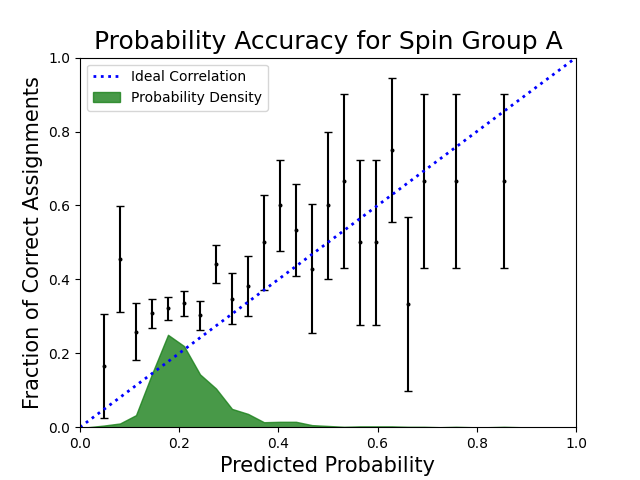

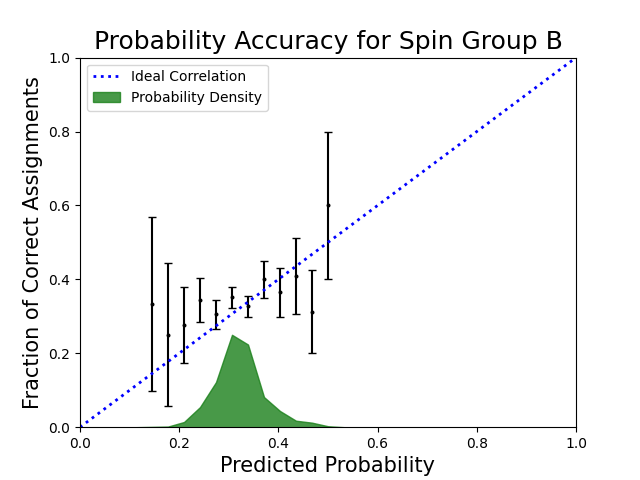

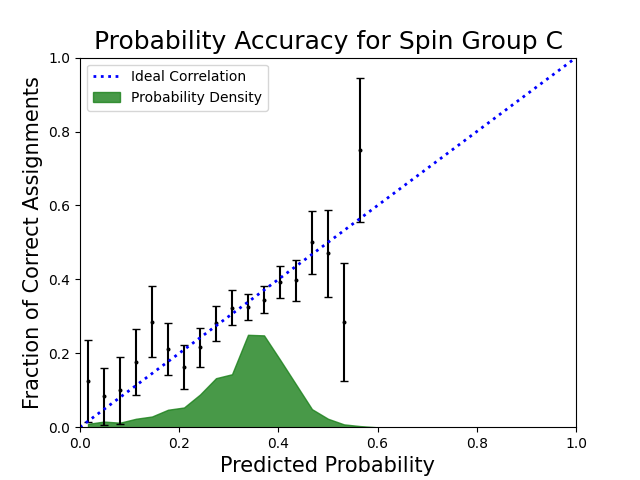

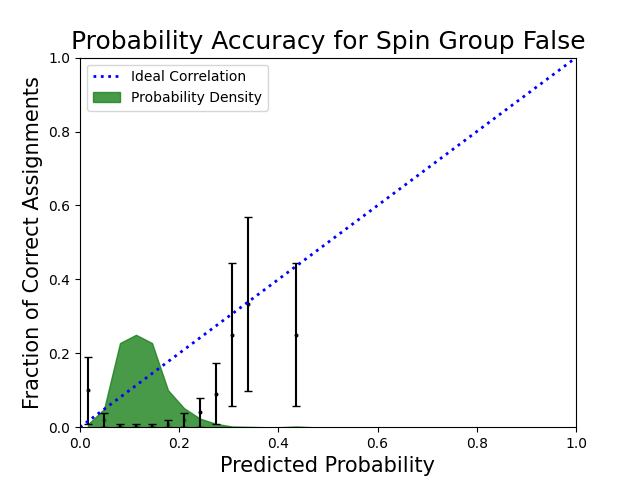

In [40]:
TAZ.analysis.PrintScore(prior, Types, 'PT-only')
TAZ.analysis.PrintScore(posterior, Types, 'Wigner+PT')
print()
TAZ.analysis.ConfusionMatrix(posterior, Types)
print()
TAZ.analysis.ProbCorrPlot(posterior, Types, fig_num=20)

# Basic Spingroup Sampling (WigSample)

### Defining Mean Parameter Data

In [32]:
# Particle Types:
Target = TAZ.Particle(Z=73, A=181, I=7/2, mass=180.9479958, name='Ta-181')
Projectile = TAZ.Neutron

# Mean Parameters:
EB    = (1e-5, 2550)
pM    = [0.12547, 0.14404]
false_dens = 1/15
lvl_dens  = [1/8.9868, 1/8.3065]
gn2m   = [44.11355, 33.38697]
gg2m   = [55.00000, 55.00000]
dfn   = [1, 1]
dfg   = [250, 250]
l     = [0, 0]
j     = [3.0, 4.0]

SGs = TAZ.Spingroup.zip(l, j)
reaction = TAZ.Reaction(targ=Target, proj=Projectile, lvl_dens=lvl_dens, gn2m=gn2m, nDOF=dfn, gg2m=gg2m, gDOF=dfg, spingroups=SGs, EB=EB, false_dens=false_dens)

print('Printing Mean Parameters:')
print(reaction)

Printing Mean Parameters:
Target Particle     = Ta-181
Projectile Particle = neutron
Channel Radius      = 7.7576830 (fm)
Energy Bounds       = 1.000e-05 < E < 2.550e+03 (eV)
False Level Density = 0.0666667 (1/eV)

                            3+          4+
Level Densities       0.111274    0.120388
Brody Parameters      1.000000    1.000000
Mean Neutron Width   44.113550   33.386970
Neutron Width DOF     1.000000    1.000000
Mean Gamma Width     55.000000   55.000000
Gamma Width DOF     250.000000  250.000000
Truncation N Width    0.000000    0.000000
Missing Fraction      0.000000    0.000000


### Sample Resonance Ladder

In [33]:
Res, Types, Missed_Res, Missed_Types = reaction.sample()

### Running WigSample

In [34]:
num_trials = 400 # number of samples
Prior, TPPrior = TAZ.PTBayes(Res, reaction)
distributions = reaction.distributions('Wigner')
runMaster = TAZ.RunMaster(Res.E, reaction.EB, distributions, reaction.false_dens, Prior, TPPrior)
Samples = runMaster.WigSample(num_trials)

### Plotting Samples against Wigner Distribution

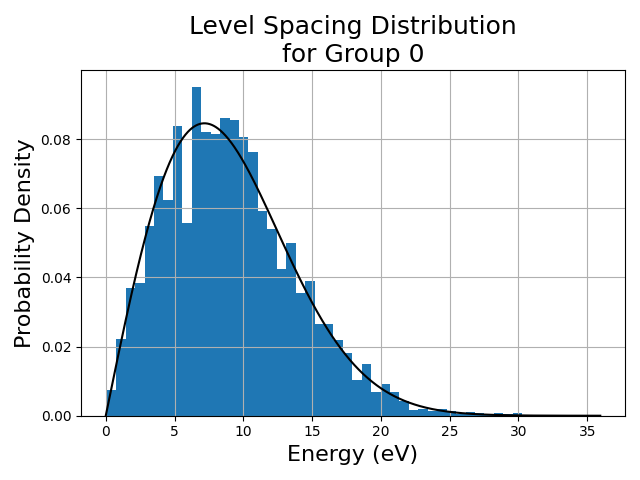

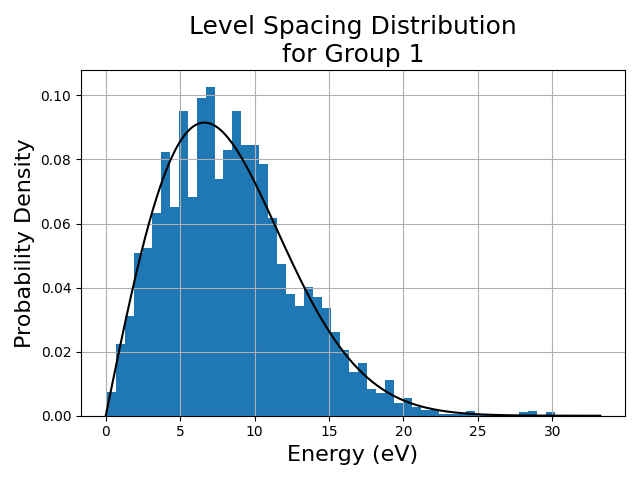

In [35]:
for g in range(2):
    lvl_spacing = np.zeros((0,))
    for trial in range(num_trials):
        E = Res.E[Samples[:,trial] == g]
        lvl_spacing = np.concatenate((lvl_spacing, np.diff(E)))
    lvl_spacing = np.sort(lvl_spacing)

    xMax = 4 / reaction.lvl_dens_all[g]
    L_fit = 1000
    X = np.linspace(0.0, xMax, L_fit)
    PDF = reaction.fit('level spacing', g)(X)

    plt.figure(g+30)
    plt.clf()
    plt.hist(lvl_spacing, 50, density=True)
    plt.plot(X, PDF, '-k')
    plt.grid()
    plt.title(f'Level Spacing Distribution\nfor Group {g}', fontsize=18)
    plt.xlabel('Energy (eV)', fontsize=16)
    plt.ylabel('Probability Density', fontsize=16)
    plt.tight_layout()
    plt.show()